# Lesson 3.06 Regularization

- Regularization is used to find the sweet spot between underfitting and overfitting models. 
    - As a result it is used to minimise bias and variance in models.
- Goal of regularization models is to tune the model coefficients in such a way that you will get more stable model coefficients
- Alpha is a parameter to tune the model or a param that informs model how aggressively you want to penalize for your coefficents
    - The higher the alpha, the lower the coefficents (which may not always result in a better model)
- There are two key regularization techniques, each of them aiming at decreasing the size of the coefficients:
    - Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
    - Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
- Lasso Regression is more aggressive in reducing coefficients to zero
 - As such Lasso can be used as a feature selector as well.
 - For example, before running a target model, you can run lasso regression and remove features with coefficent=0 and then run the target model

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# bring in advertising data
ads = pd.read_csv('Advertising.csv')

# drop Unnamed: 0 column
ads = ads.drop(columns='Unnamed: 0')
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Separating predictors and response variables

# create X and y
FEATURES = ['TV', 'radio', 'newspaper']

# All columns in feature list
predictors = ads[FEATURES]

# target column has been maintained separately in pre-built data set
response = ads['sales']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, random_state=42)

print(X_train.shape)
print(X_test.shape)

(150, 3)
(50, 3)


## Build Simple Linear Regression Model

In [5]:
# Apply simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict based on test data
lr_pred = lr.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(lr_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8843196200174288


  Column_Name  Coefficient_Value
0          TV           0.045434
1       radio           0.191457
2   newspaper           0.002568


<BarContainer object of 3 artists>

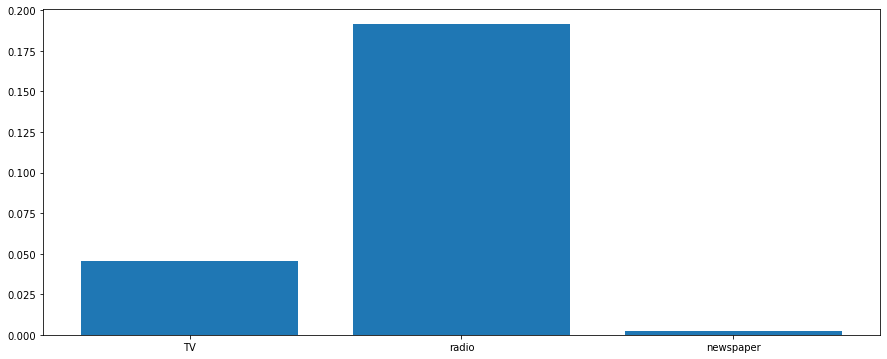

In [6]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

## Build Regularization Models - Ridge Regression (L2)

In [7]:
# Train the model
# Start with the default alpha value of 1 and experiment with different values and its impact on the R-squared values
# we will learn a more efficient technique on how to find the optimal alpha value during our model tuning lesson
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
ridge_pred = ridgeRegressor.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(ridge_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8843184672840059


  Column_Name  Coefficient_Value
0          TV           0.045434
1       radio           0.191450
2   newspaper           0.002570


<BarContainer object of 3 artists>

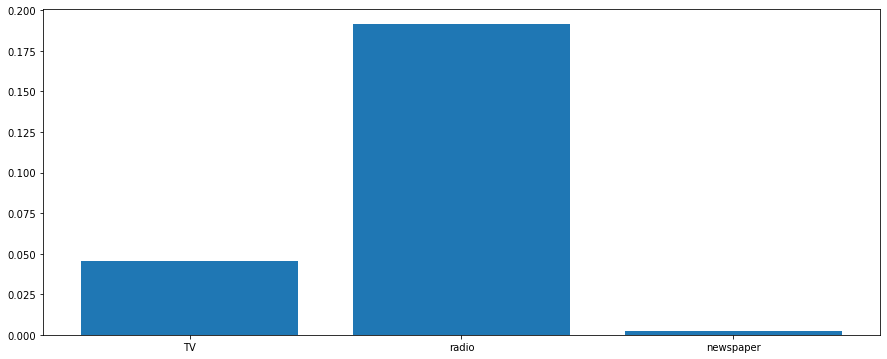

In [8]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(ridgeRegressor.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

# L2 Regularization has reduced the coefficient values from what has been observed in Linear Regression
# Note: Regularization does not always improve model performance as seen in this case where Linear outperforms Ridge

## Build Regularization Models - Lasso Regression (L1)

In [9]:
# Train the model
# Start with the default alpha value of 1 and experiment with different values and its impact on the R-squared values
# we will learn a more efficient technique on how to find the optimal alpha value during our model tuning lesson
lassoRegressor = Lasso()
lassoRegressor.fit(X_train, y_train)
lasso_pred = lassoRegressor.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(lasso_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8837418901786619


  Column_Name  Coefficient_Value
0          TV           0.045328
1       radio           0.187637
2   newspaper           0.001282


<BarContainer object of 3 artists>

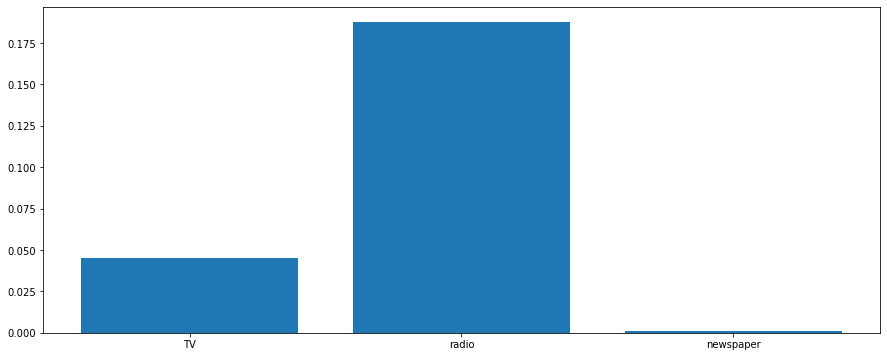

In [10]:
# Create df for storing coefficients and their corresponding variable names
coefficient_df = pd.DataFrame()

# Storing all the column names of predictors
coefficient_df['Column_Name'] = X_train.columns

# Store coefficients of predictors
coefficient_df['Coefficient_Value'] = pd.Series(lassoRegressor.coef_)

# Preview variables' coefficient values
# The higher the values, the stronger the variables
print(coefficient_df)

# Plot the coefficent values
# Goal is to tune the model so that we get a more stable model i.e. similar size coefficient values
plt.rcParams['figure.figsize'] = (15,6)
plt.bar(coefficient_df["Column_Name"], coefficient_df['Coefficient_Value'])

# L2 Regularization has reduced the coefficient values from what has been observed in Linear Regression
# Note: Regularization does not always improve model performance as seen in this case where Linear outperforms Lasso

### Using Regularization Models for Feature Selection
As seen above, since the Lasso Regression shrinks the coefficients of the weaker variables to 0, we can drop these variables and re-run the model to improve model performance

**Note:** Regularization is not the only technique to improve model performance and we will explore more techniques in future lessons

In [11]:
# Drop the newspaper column since their lasso regeession coefficients is close to zero
predictors_v2 = predictors.drop(columns=['newspaper'], axis=1)
predictors_v2.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [12]:
X_train, X_test, y_train, y_test = train_test_split(predictors_v2, response, random_state=42)

print(X_train.shape)
print(X_test.shape)

(150, 2)
(50, 2)


In [20]:
# Apply simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict based on test data
lr_pred = lr.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(y_test, lr_pred)
print('Test R-squared score :', R_squared)

# As seen below, dropping the weaker variables as identified by Lasso Regression had given us the best model performance

Test R-squared score : 0.8944787062601195
